## Libraires

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

## (1) precision@k, recall@k -- pg23


In [98]:
system_A = np.array([False] + [True] * 5 + [False] * 4)
system_B = np.array([True] * 3 + [False] * 5 + [True] * 2)

# Calculate relevant
num_relevant_A = sum(system_A)
num_relevant_B = sum(system_B)

# Rank discount
rank = np.array(range(1,11))

In [99]:
precision_A = np.cumsum(system_A)/rank
precision_B = np.cumsum(system_B)/rank

In [100]:
recall_A = np.cumsum(system_A)/num_relevant_A
recall_B = np.cumsum(system_B)/num_relevant_B

In [101]:
A_df = pd.DataFrame({'precision': precision_A, 'recall': recall_A, 'method': 'A', 'rank': rank})
B_df = pd.DataFrame({'precision': precision_B, 'recall': recall_B, 'method': 'B', 'rank': rank})

In [102]:
# Concatenate the dataframes
data = pd.concat([A_df, B_df])
data

,precision,recall,method,rank
0,0.000000,0.0,A,1
1,0.500000,0.2,A,2
2,0.666667,0.4,A,3
3,0.750000,0.6,A,4
4,0.800000,0.8,A,5
5,0.833333,1.0,A,6
6,0.714286,1.0,A,7
7,0.625000,1.0,A,8
8,0.555556,1.0,A,9
9,0.500000,1.0,A,10


recall

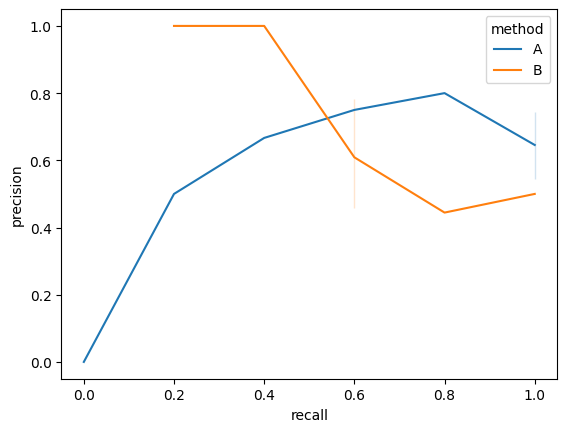

In [103]:
plot = sns.lineplot(pd.concat([A_df,B_df]), x ='recall', y ='precision', hue='method')

rank

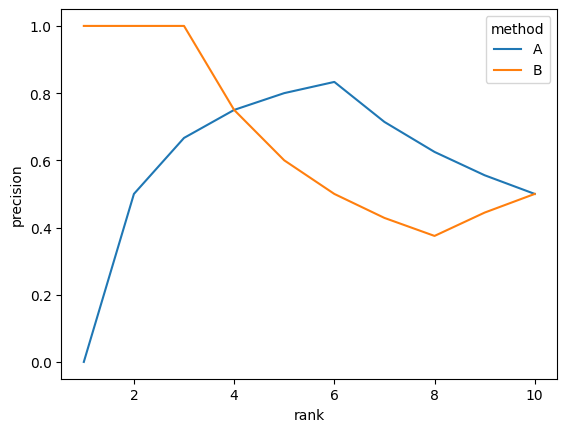

In [104]:
plot = sns.lineplot(pd.concat([A_df,B_df]), x ='rank', y ='precision', hue='method')

## (2) ap -- pg 27


In [105]:
# Calculate AP for system A
ap_A = np.sum(precision_A * system_A) / num_relevant_A

# Calculate AP for system B
ap_B = np.sum(precision_B * system_B) / num_relevant_B

print(f"AP for system A: {ap_A}")
print(f"AP for system B: {ap_B}")


AP for system A: 0.71
AP for system B: 0.788888888888889


## (3) ndcg -- pg 40


In [106]:
# Define relevance scores
relevance_scores = {'Critical': 3, 'Major': 2, 'Minor': 1}

# Define the outputs of the ranking systems
system_A = np.array(['Minor', 'Critical', 'Critical', 'Critical', 'Critical', 'Minor', 'Critical', 'Minor', 'Minor', 'Minor'])
system_B = np.array(['Critical', 'Critical', 'Critical', 'Minor', 'Minor', 'Minor', 'Minor', 'Critical', 'Critical', 'Minor'])

# Convert the outputs to relevance scores
system_A_scores = np.array([relevance_scores[i] for i in system_A])
system_B_scores = np.array([relevance_scores[i] for i in system_B])

# Function to calculate DCG
def dcg_at_k(scores, k):
    return np.sum(scores[:k] / np.log2(np.arange(2, k + 2)))

# Function to calculate NDCG
def ndcg_at_k(scores, k):
    # ideal = sorted(scores, reverse=True)
    idcg = dcg_at_k(sorted(scores, reverse=True), k)
    return dcg_at_k(scores, k) / idcg

# Calculate NDCG@5 for both systems
ndcg_A = ndcg_at_k(system_A_scores, 5)
ndcg_B = ndcg_at_k(system_B_scores, 5)

print(f"NDCG@5 for system A: {ndcg_A}")
print(f"NDCG@5 for system B: {ndcg_B}")


NDCG@5 for system A: 0.7738931964842558
NDCG@5 for system B: 0.8151510484299677
